In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the datasets

data_sin_outliers = pd.read_csv("data_sin_outliers.csv", delimiter = ',')
print(f"Observaciones : {data_sin_outliers.shape[0]:,}")
print(f"Columnas      : {data_sin_outliers.shape[1]}")

df_dummies = pd.read_csv("df_dummies.csv", delimiter = ',')
print(f"Observaciones : {df_dummies.shape[0]:,}")
print(f"Columnas      : {df_dummies.shape[1]}")

Observaciones : 92,914
Columnas      : 16
Observaciones : 100,000
Columnas      : 16


In [9]:
from sklearn.model_selection import train_test_split


#Divide the data into features (X) and the target variable (y)
X = df_dummies.drop('diabetes', axis=1)
y = df_dummies['diabetes']
X_SO = data_sin_outliers.drop('diabetes', axis=1)
y_SO = data_sin_outliers['diabetes']


#Divide the data into a training set and a test set (e.g. 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_SO, X_test_SO, y_train_SO, y_test_SO = train_test_split(X_SO, y_SO, test_size=0.2, random_state=42)

In [15]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


#Define the models you want to evaluate
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier())
]


#Define the number of "folds" for cross-validation
n_folds = 3


#Take a smaller sample of your data to speed up evaluation
sample_size = 0.2


#Perform cross-validation for each model and display metrics
for name, model in models:
    print(f"Model: {name}")
    scores = cross_val_score(model, X_train.sample(frac=sample_size), y_train.sample(frac=sample_size), cv=n_folds)
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Cross-Validation Score: {np.mean(scores)}")
   


    # Train and evaluate the model on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # Calculate evaluation metrics on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision on test set: {precision}")
    print(f"Recall on test set: {recall}")
    print(f"F1-Score on test set: {f1}")
    print("\n")

Model: Logistic Regression
Cross-Validation Scores: [0.91619798 0.91636977 0.91618226]
Mean Cross-Validation Score: 0.9162500032517499
Precision on test set: 0.8676222596964587
Recall on test set: 0.6024590163934426
F1-Score on test set: 0.7111264685556324


Model: Random Forest
Cross-Validation Scores: [0.90926134 0.90868179 0.90924433]
Mean Cross-Validation Score: 0.9090624875715775
Precision on test set: 0.9476228847703465
Recall on test set: 0.6885245901639344
F1-Score on test set: 0.7975584944048829


Model: SVM
Cross-Validation Scores: [0.91432321 0.91430714 0.91430714]
Mean Cross-Validation Score: 0.9143124993306083
Precision on test set: 1.0
Recall on test set: 0.3729508196721312
F1-Score on test set: 0.5432835820895523


Model: XGBoost
Cross-Validation Scores: [0.91451069 0.91318207 0.9135571 ]
Mean Cross-Validation Score: 0.9137499524541431
Precision on test set: 0.9603880355699272
Recall on test set: 0.6955503512880562
F1-Score on test set: 0.8067911714770799




In [17]:


#Define the models you want to evaluate
models = [
("Logistic Regression", LogisticRegression()),
("Random Forest", RandomForestClassifier()),
("SVM", SVC()),
("XGBoost", XGBClassifier())
]


#Define the number of "folds" for cross-validation
n_folds = 3


#Take a smaller sample of your data to speed up evaluation
sample_size = 0.2


#Perform cross-validation for each model and display metrics on the outlier-free set (SO)
for name, model in models:
    print(f"Model: {name} - Outlier-free Set (SO)")
    scores = cross_val_score(model, X_train_SO.sample(frac=sample_size), y_train_SO.sample(frac=sample_size), cv=n_folds)
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Cross-Validation Score: {np.mean(scores)}")


    #Train and evaluate the model on the outlier-free test set (SO)
    model.fit(X_train_SO, y_train_SO)
    y_pred_SO = model.predict(X_test_SO)


    #Calculate evaluation metrics on the outlier-free test set (SO)
    accuracy_SO = accuracy_score(y_test_SO, y_pred_SO)
    precision_SO = precision_score(y_test_SO, y_pred_SO)
    recall_SO = recall_score(y_test_SO, y_pred_SO)
    f1_SO = f1_score(y_test_SO, y_pred_SO)
    print(f"Precision on outlier-free test set (SO): {precision_SO}")
    print(f"Recall on outlier-free test set (SO): {recall_SO}")
    print(f"F1-Score on outlier-free test set (SO): {f1_SO}")
    print("\n")

Model: Logistic Regression - Outlier-free Set (SO)
Cross-Validation Scores: [0.92372881 0.92371342 0.92371342]
Mean Cross-Validation Score: 0.9237185517111631
Precision on outlier-free test set (SO): 0.853585657370518
Recall on outlier-free test set (SO): 0.62372634643377
F1-Score on outlier-free test set (SO): 0.7207737594617326


Model: Random Forest - Outlier-free Set (SO)
Cross-Validation Scores: [0.92655367 0.92573158 0.92815338]
Mean Cross-Validation Score: 0.9268128789995078
Precision on outlier-free test set (SO): 0.9477386934673366
Recall on outlier-free test set (SO): 0.6863173216885007
F1-Score on outlier-free test set (SO): 0.7961165048543689


Model: SVM - Outlier-free Set (SO)
Cross-Validation Scores: [0.92211461 0.92209889 0.92209889]
Mean Cross-Validation Score: 0.922104129525156
Precision on outlier-free test set (SO): 1.0
Recall on outlier-free test set (SO): 0.3544395924308588
F1-Score on outlier-free test set (SO): 0.523374529822676


Model: XGBoost - Outlier-free S

Inference: 
- Based on the analysis and considering the class imbalance and the importance of detecting false positives, the model that best fits our requirements is XGBoost on our outlier-free set (SO), as it yields the highest accuracy (0.95) and F1-score (0.801).

In [20]:

from sklearn.model_selection import RandomizedSearchCV


#Define the XGBoost model
xgb_model = XGBClassifier()


#Define the hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


#Perform random search for hyperparameters
random_search = RandomizedSearchCV(
   xgb_model,param_distributions=param_dist,
   n_iter=10,scoring='accuracy',cv=5,random_state=42,n_jobs=-1
)

#Fit the model to the data
random_search.fit(X_train_SO, y_train_SO)


#Display the best hyperparameters found
print("Best hyperparameters found:")
print(random_search.best_params_)


#Evaluate the model with the best hyperparameters on the test set
y_pred = random_search.best_estimator_.predict(X_test_SO)
accuracy = accuracy_score(y_test_SO, y_pred)
precision = precision_score(y_test_SO, y_pred)
recall = recall_score(y_test_SO, y_pred)
f1 = f1_score(y_test_SO, y_pred)

print(f"Precision on test set: {precision}")
print(f"Recall on test set: {recall}")
print(f"F1-Score on test set: {f1}")

Best hyperparameters found:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Precision on test set: 1.0
Recall on test set: 0.6775836972343523
F1-Score on test set: 0.8078091106290672


Inference: According to the analysis, the best hyperparameters for our model are:


- subsample: 1.0

- n_estimators: 200

- min_child_weight: 4

- max_depth: 6

- learning_rate: 0.01

- colsample_bytree: 0.9


These hyperparameters have been determined as the most optimal for our model after a process of search and optimization.

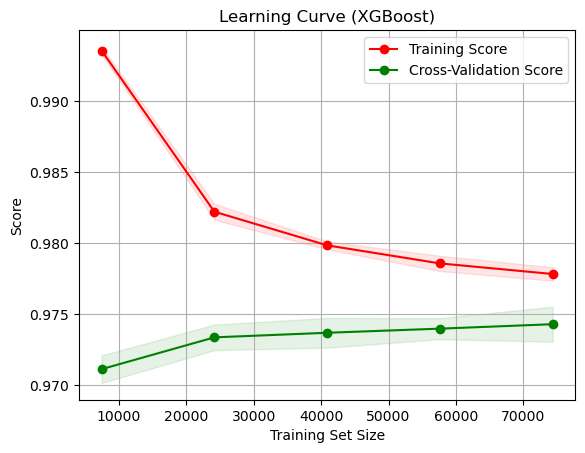

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generates a learning curve to evaluate if the model has overfitting.

    Parameters:
    estimator: Supervised learning model (classifier or regressor)
    title: Title of the graph
    X: Feature matrix
    y: Label vector
    ylim: Tuple (ymin, ymax) to set the limits on the y-axis
    cv: Cross-validation strategy
    n_jobs: Number of CPU cores to compute in parallel (None to use all available)
    train_sizes: Training set sizes for which learning scores will be computed

    Returns:
    Learning curve graph
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X_SO,
        y_SO,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    return plt

# Usage:
title = "Learning Curve (XGBoost)"
estimator = XGBClassifier()
plot_learning_curve(estimator, title, X_train_SO, y_train_SO, cv=5, n_jobs=-1)
plt.show()

Inference: 
- The learning curve suggests that the gap between training and cross-validation scores narrows as the training set size increases, indicating a reduction in overfitting.

**Conclusion** on the Importance of Detecting Diabetes Cases


Early and accurate detection of diabetes cases is crucial for improving patients' quality of life, reducing healthcare costs, and promoting healthy lifestyles. Some key conclusions related to the metrics obtained with our diabetes prediction model are:


- **Improved Quality of Life**: Early detection enables effective diabetes management, reducing the risk of severe complications and improving quality of life.


- **Cost Reduction**: Helps reduce costs associated with intensive medical treatments and hospitalizations.


- **Promotion of Healthy Lifestyles**: Detection encourages healthier habits, such as proper nutrition and regular exercise.


- **Prevention of Complications**: Contributes to preventing or delaying disease complications.


- **Identification of Risk Factors*: Allows identification of individuals at risk and implementation of preventive measures.


Regarding our model, the obtained metrics, such as precision, recall, and F1-Score, indicate its ability to detect diabetes cases. These metrics are essential for evaluating the model's effectiveness and its utility in clinical practice.